# Translations

In this notebook, the NN learns how to essentially take two numbers and add them. What is interesting is that depending on the activation funciton, and the inclusion of bias terms affects the networks ability to add numbers outside of the range that was used to train it (-1,1).

In [56]:
class Translations(nn.Module):
    def __init__(self):
        super(Translations, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(2,2,bias=True),
            nn.LeakyReLU(),
            nn.Linear(2,1,bias=False))
        
    def forward(self, x):
        out = self.layer1(x)
        return out

In [57]:
model = Translations()
model.cuda()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
total_loss = []

In [58]:
model

Translations(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): LeakyReLU(0.01)
    (2): Linear(in_features=2, out_features=1, bias=False)
  )
)

In [65]:
num_samples = 5000
for k in range(num_samples):   
    # ===================data prep===================
    data   = Variable(torch.randn(2)).cuda()
    target = torch.sum(data)
    # ===================forward=====================
    output = model(data)
    loss   = criterion(output, target)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   
    # ===================log========================
    total_loss.append(loss.data[0])
    if (k+1)%(num_samples//10)==0:
        print('[{}] loss:{:.3f}, diff:{:.3f}'
              .format(k+1, total_loss[-1], np.abs(target.data[0]-output.data[0])))

[500] loss:0.650, diff:0.806
[1000] loss:1.762, diff:1.327
[1500] loss:0.034, diff:0.185
[2000] loss:0.001, diff:0.023
[2500] loss:0.075, diff:0.274
[3000] loss:0.026, diff:0.162
[3500] loss:0.001, diff:0.023
[4000] loss:0.000, diff:0.005
[4500] loss:1.410, diff:1.187
[5000] loss:0.415, diff:0.644


<IPython.core.display.Javascript object>


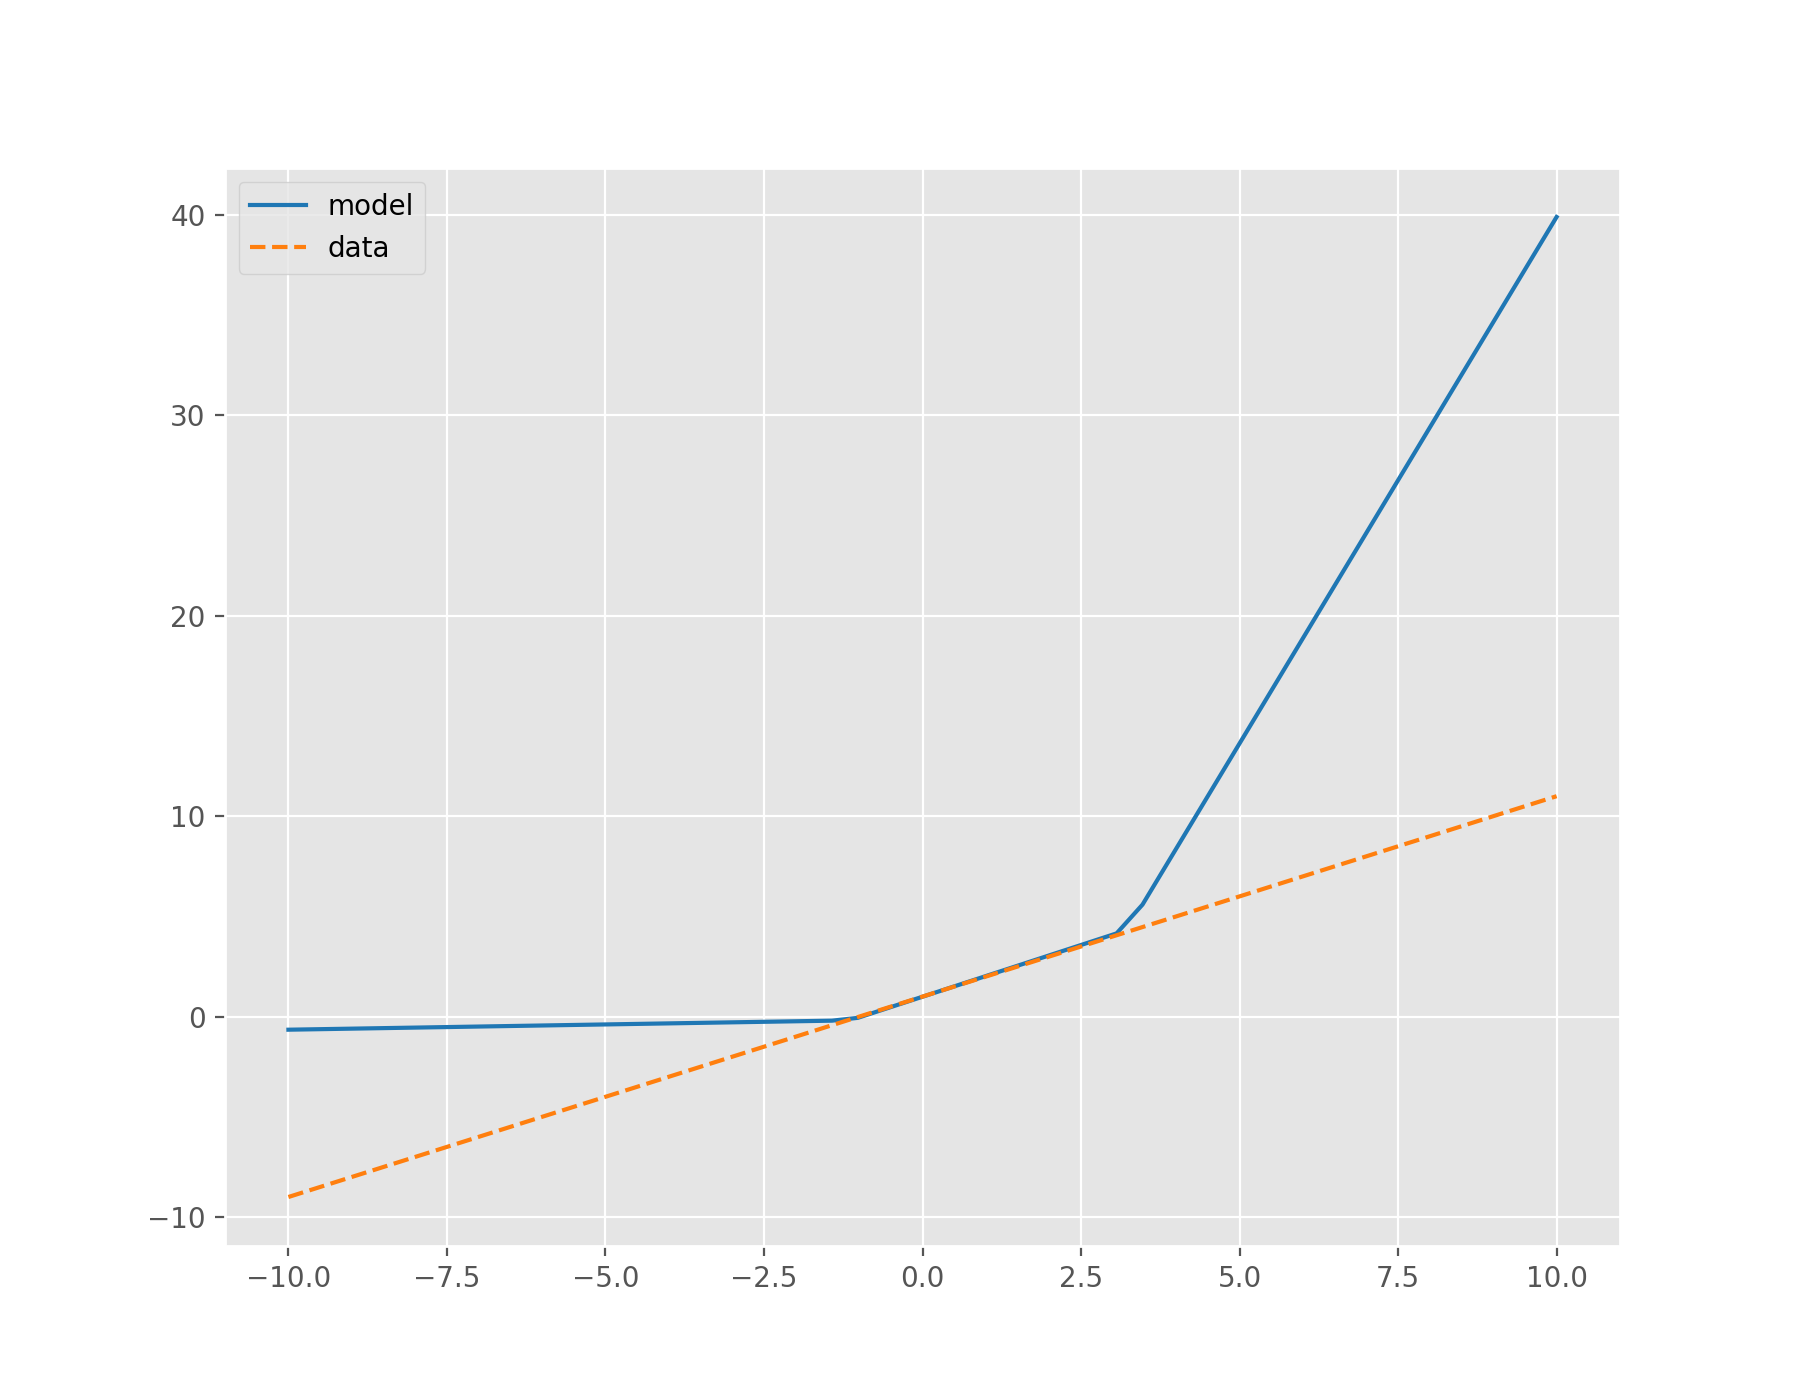

In [66]:
y = []
x = np.linspace(-10,10)
for k in x:
    mynumber = np.array([k,1])
    data1   = Variable(torch.from_numpy(mynumber)).type(torch.cuda.FloatTensor)
    target = data1[0] + data1[1]
    output = model(data1)
    y.append(output.data[0])

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(x,y, label='model')
ax.plot(x,x+1, label='data',ls='--')
ax.legend();

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import torch
import torch.nn as nn
from torch.autograd import Variable
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

plt.style.use('ggplot')
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))